# Mini Project 1

The purpose of this project is to predicting the target MPG using machine learning. 

The following section is initialization of all dependencies or libraries.

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from zlib import crc32
import hashlib

Reading data from auto-mpg.csv file

In [3]:
# index_col 'car name' used to make sure this column is not used as index
mpg_data = pd.read_csv('auto-mpg.csv', index_col='car name', delimiter = ',')

## Data Visulization

The following code prints out the result from csv file

In [4]:
# Data output, table size shown
print(mpg_data)
mpg_data.info()

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   
...                         ...        ...           ...         ...     ...   
ford mustang gl            27.0          4         140.0        86.0    2790   
vw pickup                  44.0          4          97.0        52.0    2130   
dodge rampage              32.0          4         135.0        84.0    2295   
ford ranger                28.0          4         120.0        79.0    2625   
chevy s-10                 31.0         

In [5]:
print(mpg_data.head()) # First five entries in table printed
print(mpg_data.index) # Range of entries
print(mpg_data.columns) # List of features in table

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index

In [6]:
# Size of data table
mpg_data.shape

(398, 8)

In [7]:
# Shows count, mean, standard deviation, minimum, maximum, along with 25th, 50th, and 75th percentiles of each feature
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# MPG feature specific description including data type of MPG
mpg_data.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

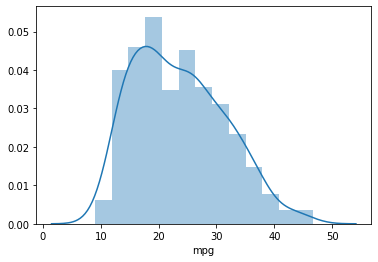

In [9]:
# Distribution plot of MPG feature from table entries (combines histogram and line estimate)
sns.distplot(mpg_data['mpg'])

In [10]:
# Removing all NULL elements through data checking
# If any elements in any column has any NULL, we will remove it from the dataset
mpg_data.isnull().any()
mpg_data.shape

(398, 8)

In [11]:
# Size of table after removing entires that contain a NULL value
mpg_data = mpg_data[mpg_data.horsepower.notnull()]
mpg_data.shape

(392, 8)

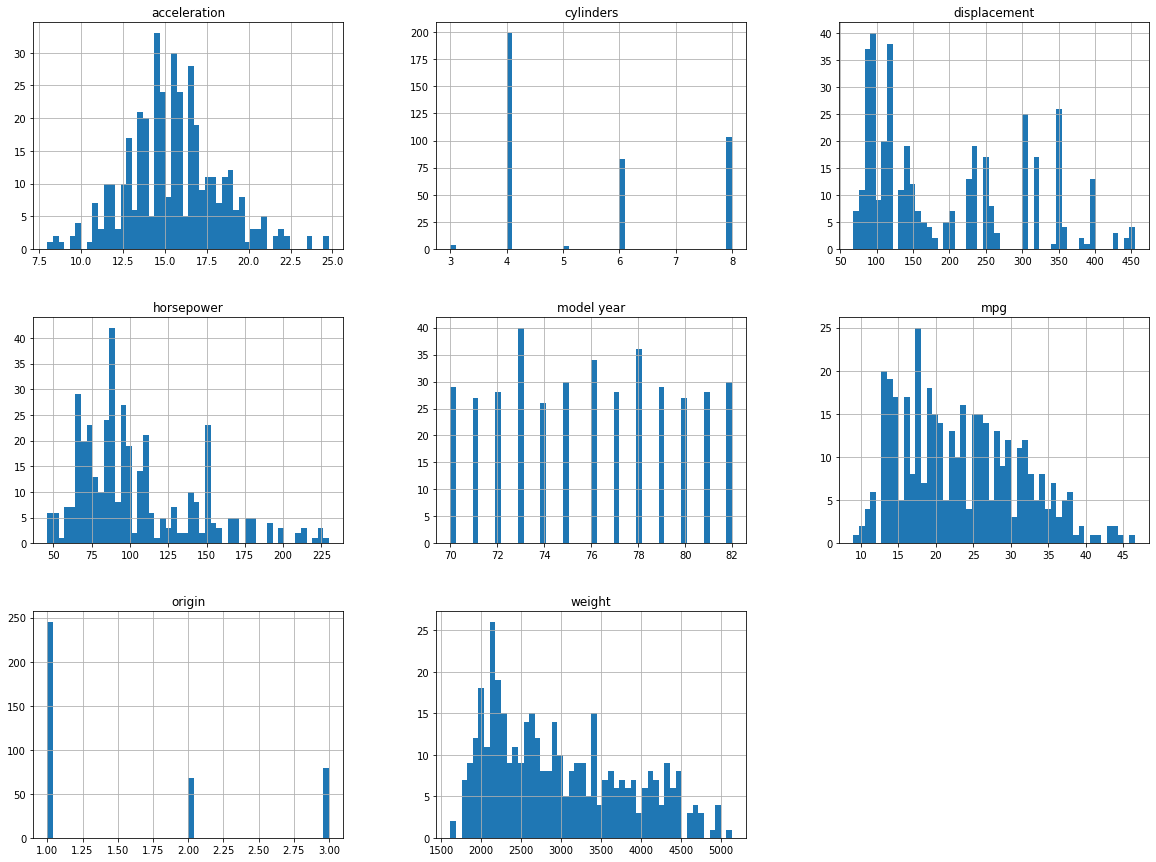

In [12]:
# Histograms of each feature in table, split into 50 bins
mpg_data.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
# Make notebook's output identical for every run
np.random.seed(42)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [15]:
# Separate MPG column from main table
X = mpg_data.drop('mpg', axis=1)
Y = mpg_data[['mpg']]
print(X.shape, Y.shape)

(392, 7) (392, 1)


In [16]:
# Set metrics for histogram plot
mpg_data["mpg"] = pd.cut(mpg_data["mpg"],
                        bins=[0., 9., 18., 27., 36., 45., np.inf],
                        labels=[1, 2, 3, 4, 5, 6])

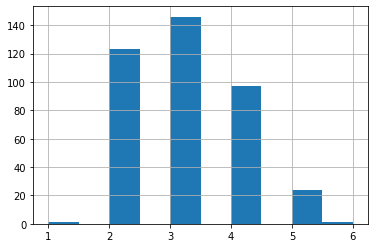

In [17]:
# MPG - what we want to predict
mpg_data["mpg"].hist()

## Normalization

In [18]:
# Normalizing the data
scaler = MinMaxScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [20]:
# X variable are the other features in table, y variable is the target
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(mpg_data[factors].copy())
y = mpg_data['mpg'].copy()

In [21]:
# Normalize the data
X = StandardScaler().fit_transform(X)

In [22]:
print(X)

[[ 1.48394702  1.07728956  0.66413273 ...  0.62054034 -0.71664105
  -1.62531533]
 [ 1.48394702  1.48873169  1.57459447 ...  0.84333403 -0.71664105
  -1.62531533]
 [ 1.48394702  1.1825422   1.18439658 ...  0.54038176 -0.71664105
  -1.62531533]
 ...
 [-0.86401356 -0.56847897 -0.53247413 ... -0.80463202 -0.71664105
   1.63640964]
 [-0.86401356 -0.7120053  -0.66254009 ... -0.41562716 -0.71664105
   1.63640964]
 [-0.86401356 -0.72157372 -0.58450051 ... -0.30364091 -0.71664105
   1.63640964]]


## Training (Linear Regression)

In [23]:
# Train using linear regression
regressor = LinearRegression()

In [24]:
# Approach #1: 80/20 training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [25]:
# Get parameters
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [26]:
# Fit training model
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Assign prediction
y_predicted = regressor.predict(X_test)

In [28]:
# Using Root Mean Square Error as Cost Function
# Printing out result of equation
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

0.4302167435209366

## Training (Decision Tree Regression)

In [41]:
decision_tree_reg = DecisionTreeRegressor(random_state = 324)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=324)
X_train.shape[0] == y_train.shape[0]
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=324, splitter='best')

In [42]:
y_predicted_dtr = decision_tree_reg.predict(X_test)
dtr_rmse = sqrt(mean_squared_error(y_true = y_test, y_pred = y_predicted_dtr))

In [43]:
dtr_rmse

0.5736845161328942

## Training (Random Forest Regression)

In [44]:
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 324)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=324)
X_train.shape[0] == y_train.shape[0]
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=324, verbose=0,
                      warm_start=False)

In [45]:
y_predicted_forest = forest_reg.predict(X_test)
forest_rmse = sqrt(mean_squared_error(y_true = y_test, y_pred = y_predicted_forest))
forest_rmse

0.4200662997700859

## Tuning Model 

In [136]:
# Tuning the Model with Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=5000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [137]:
# Gather parameters
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5000,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [138]:
# Assign prediction
y_predicted_gbr = gb_regressor.predict(X_test)

In [139]:
# Root Mean Square Error as Cost Function
# Printing out result
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

0.37692592869959624

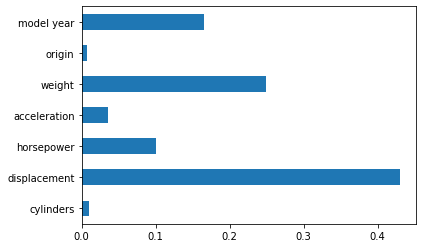

In [140]:
# Which features are the most important
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [144]:
# Transforming the data
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])
print(factors)
c

['cylinders', 'displacement', 'horsepower', 'acceleration', 'weight', 'origin', 'model year']


array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

In [145]:
# Entries with model year newer than 1970
# Entries with a displacement greater than 425.0
mpg_data[(mpg_data['model year'] >= 70 )&( mpg_data.displacement>425)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford galaxie 500,2,8,429.0,198.0,4341,10.0,70,1
chevrolet impala,2,8,454.0,220.0,4354,9.0,70,1
plymouth fury iii,2,8,440.0,215.0,4312,8.5,70,1
pontiac catalina,2,8,455.0,225.0,4425,10.0,70,1
buick estate wagon (sw),2,8,455.0,225.0,3086,10.0,70,1
mercury marquis,2,8,429.0,208.0,4633,11.0,72,1
mercury marquis brougham,2,8,429.0,198.0,4952,11.5,73,1
chrysler new yorker brougham,2,8,440.0,215.0,4735,11.0,73,1
buick electra 225 custom,2,8,455.0,225.0,4951,11.0,73,1
